<a href="https://colab.research.google.com/github/HilaryAlabi/one/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification

### Tables of Contents

1. Background
2. Importing the data
3. Data cleansing
4. Feature selection
5. Feature construction
6. Feature preprocessing
7. Training
8. Validation

## 1.Background

The following notebook describes the creation of a heart disease classifier, comparing the use of a logistic regression model and a neural network to predict the presence of coronary artery disease.

The dataset used, the Cleveland dataset, was obtained from [UCI](http://archive.ics.uci.edu/ml/datasets/heart+Disease). It contains 14 attributes collected for patients with and without coronary artery disease.

The 14 attributes were classified as the most relevnt for the disease area. The cleaveland dataset was processed and the 14 were decided to be the most relevant. This notebook will also look to exploring the other attibutes to decide wheter or not the variables can be crossed out. 

### 1.1 Features 

1. age: age in years       
2. sex:
 - Value 0: female
 - Value 1: male     
3. cp: chest pain type 
 - Value 1: typical angina 
 - Value 2: atypical angina 
 - Value 3: non-anginal pain 
 - Value 4: asymptomatic 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5. chol: serum cholestoral in mg/dl       
6. fbs: fasting blood sugar > 120 mg/dl 
 - Value 0: false
 - Value 1: true     
7. restecg: resting electrocardiographic results 
 - Value 0: normal 
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina 
 - Value 0: false
 - Value 1: true    
10. oldpeak: ST depression induced by exercise relative to rest   
11. slope: the slope of the peak exercise ST segment      
 - Value 1: upsloping 
 - Value 2: flat 
 - Value 3: downsloping 
12. ca: number of major vessels (0-3) colored by flourosopy        
13. thal: 
 - Value 3: normal
 - Value 6: fixed defect
 - Value 7: reversable defect     
14. num: diagnosis of heart disease (angiographic disease status) 
 - Value 0: < 50% diameter narrowing 
 - Value 1: > 50% diameter narrowing  

### 1.2 Required Imports

In [ ]:
%matplotlib inline 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline #WHat does this classify ? 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.patches as mpatches

#from sklearn.base import clone
#from sklearn.neighbors import KNeighborsClassifier

#from itertools import combinations
#import itertools


## 2.Importing and Reading Datasets

### 2.1 Importing Processed Data 

In [ ]:
# Load in all the different heart disease datasets
cleaveland = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data' 

In [ ]:
# Analyse the Cleaveland dataset 
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df = pd.read_csv(cleaveland, header=None)
df.columns=columns

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### 2.2 Importing Unprocessed Data - Full list of 76 variable.

## 3.Data Exploration and Visualisation

### 3.1 Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


`ca` and `thal` are objects and need to be converted to floats (numeric)

Before we do this we must check if there are any missing values - we wil ldo this in the data exploration section. 

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
print("the range is", min(df['age']), " to ", max(df['age']), " with a mean of ", (df['age'].sum()/ len(df['age'])))

the range is 29.0  to  77.0  with a mean of  54.43894389438944


In [ ]:
df['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [ ]:
# Visualising the Frequency of the sex 



In [ ]:
# Target Variable are currently in numbers - [0] = normal [1,2,3,4] = abnormal
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

In [ ]:
# Visualising the frequency of the results. 

### 3.1 Missing Variables

In [ ]:
# Find missing variables 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Review the categories in the categorical variable - to check for missingness 
ca_cat = df.ca.value_counts()
thal_cat = df.thal.value_counts()

print(ca_cat)
print(thal_cat)

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64
3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64


`thal` and `ca` have '?' variable as one of their categories. These will be classified as NaN and either remove or imputed. 

In [ ]:
# we replace ? with NaN to allow us to calculate descriptive statistics
df = df.replace("?",np.NaN)

# make numeric
df = df.apply(pd.to_numeric)

In [ ]:
# Drop Missing variables / NaN rows 
df = df.dropna()

In [ ]:
# Check if NaN variables have been dropped 
ca_cat = df.ca.value_counts()
thal_cat = df.thal.value_counts()

print(ca_cat)
print(thal_cat)

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


### 3.2 Data Visualisations 

#### 3.2.1 Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca1d70d750>,
      dtype=object)

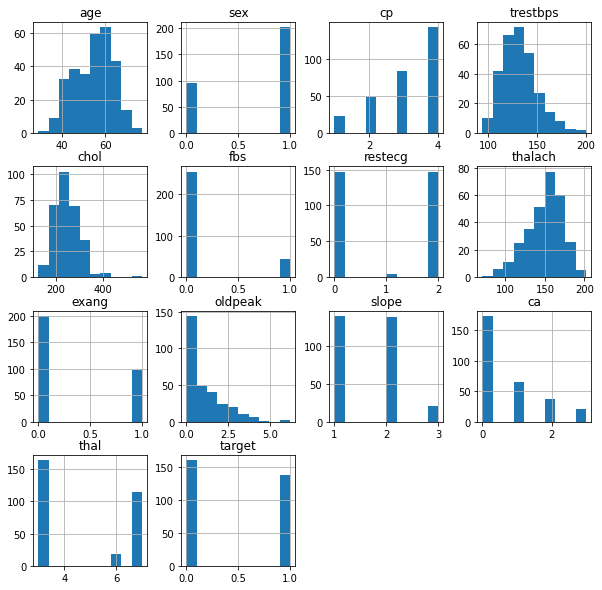

In [ ]:
df.hist(figsize = (10, 10))

Shows the following:
- age, cp, sex, and thalach have a right skew
- ca, cholestrol, exang, fps, slope, thal, and trestbps have a left skew

Rarely normally distributed as would be expected in general population. Could be due to many of the categories not being continuous and instead representing thresholds

#### 3.2.2 Box Plot

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

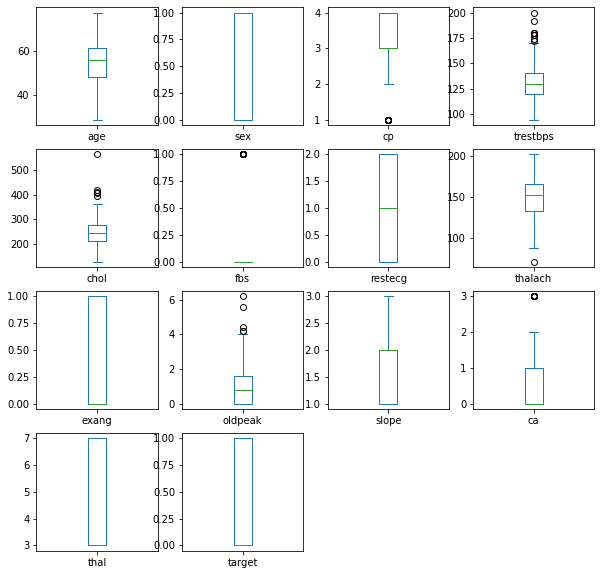

In [ ]:
df.plot(kind = 'box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))

oldpeak, chol, fbs, cp and trestbpd have a few outliers - this can be removed by normalising the variables. 

#### 3.2.3 Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix for Heart Disease Data')

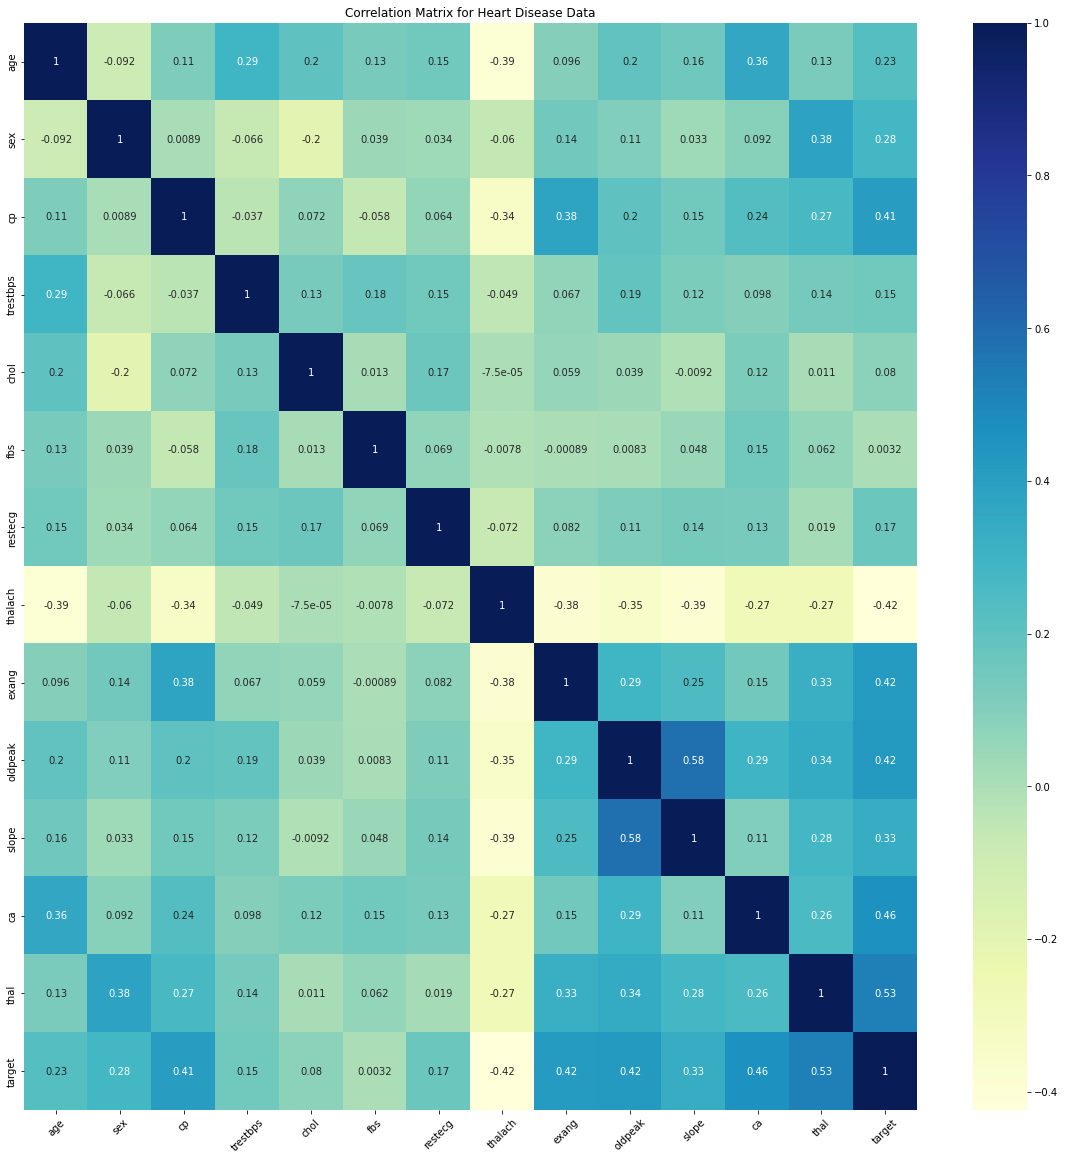

In [ ]:
corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(20,20)
plt.title('Correlation Matrix for Heart Disease Data')

Based on this correlation matrix - `oldpeak` `ca` and `thal` are highly correlated with the target variable. - they have strong correlation with the target variable. 

#### 3.2.4 Bar Plots  

In [ ]:
# Sex and Target Variable are currently in numbers - 
# the categories will be mapped to better descritive variables - 
# what do the different numbers mean for the target result
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

cdf1 = df.copy(deep=True)
cdf1['sex'] = cdf1.sex.map({0: 'female', 1: 'male'})

In [ ]:
cdf1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,male,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,male,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,male,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,male,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,female,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
cdf1['sex'].value_counts()

male      201
female     96
Name: sex, dtype: int64

In [ ]:
cdf1['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

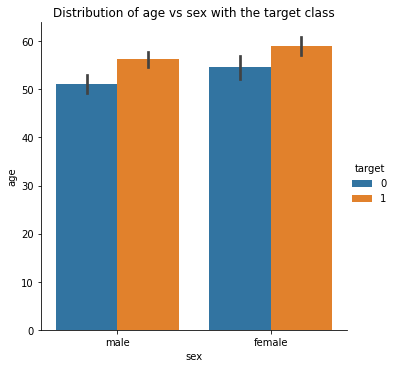

In [ ]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = cdf1, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

#### 3.2.5 Distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

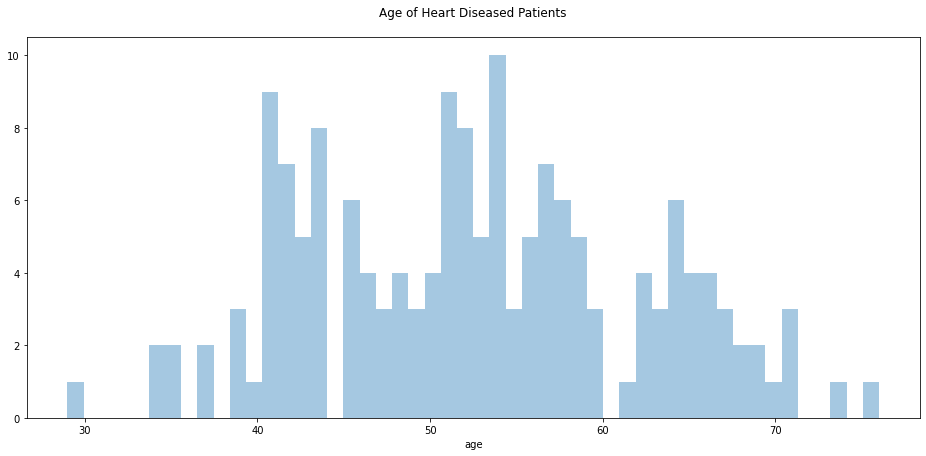

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

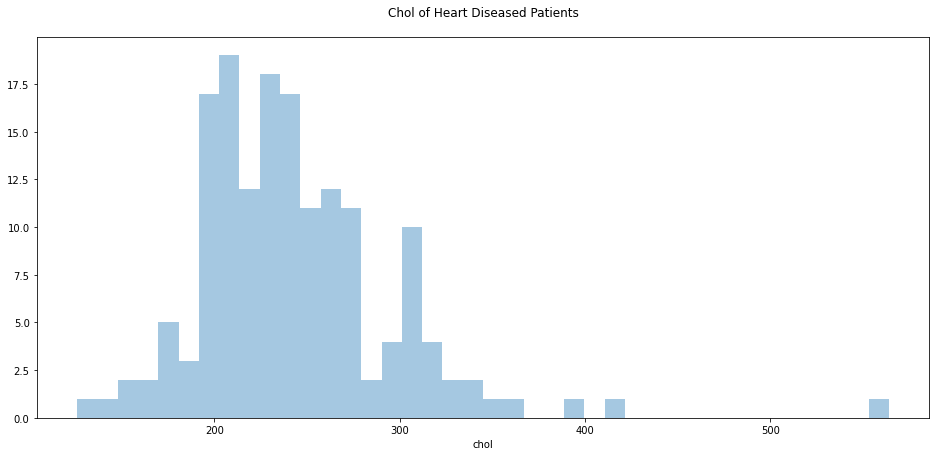

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

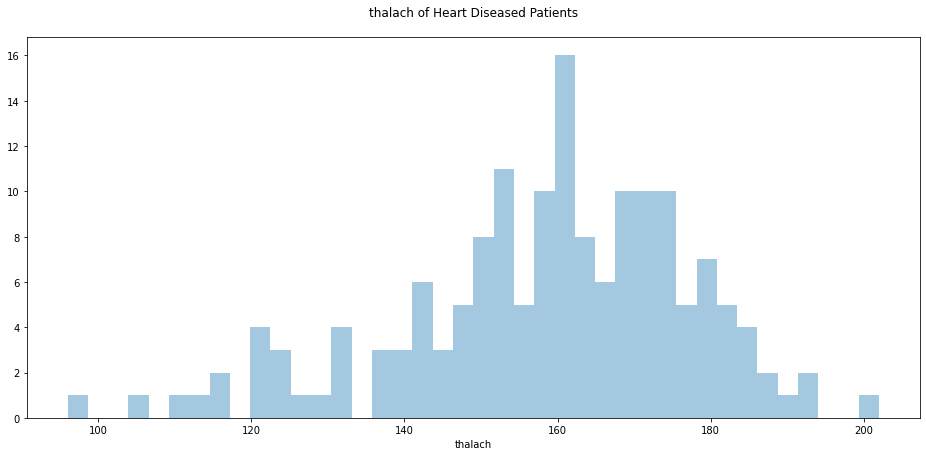

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

#### 3.2.6 3D Visualistion using PCA for dimensionality reduction 

No handles with labels found to put in legend.


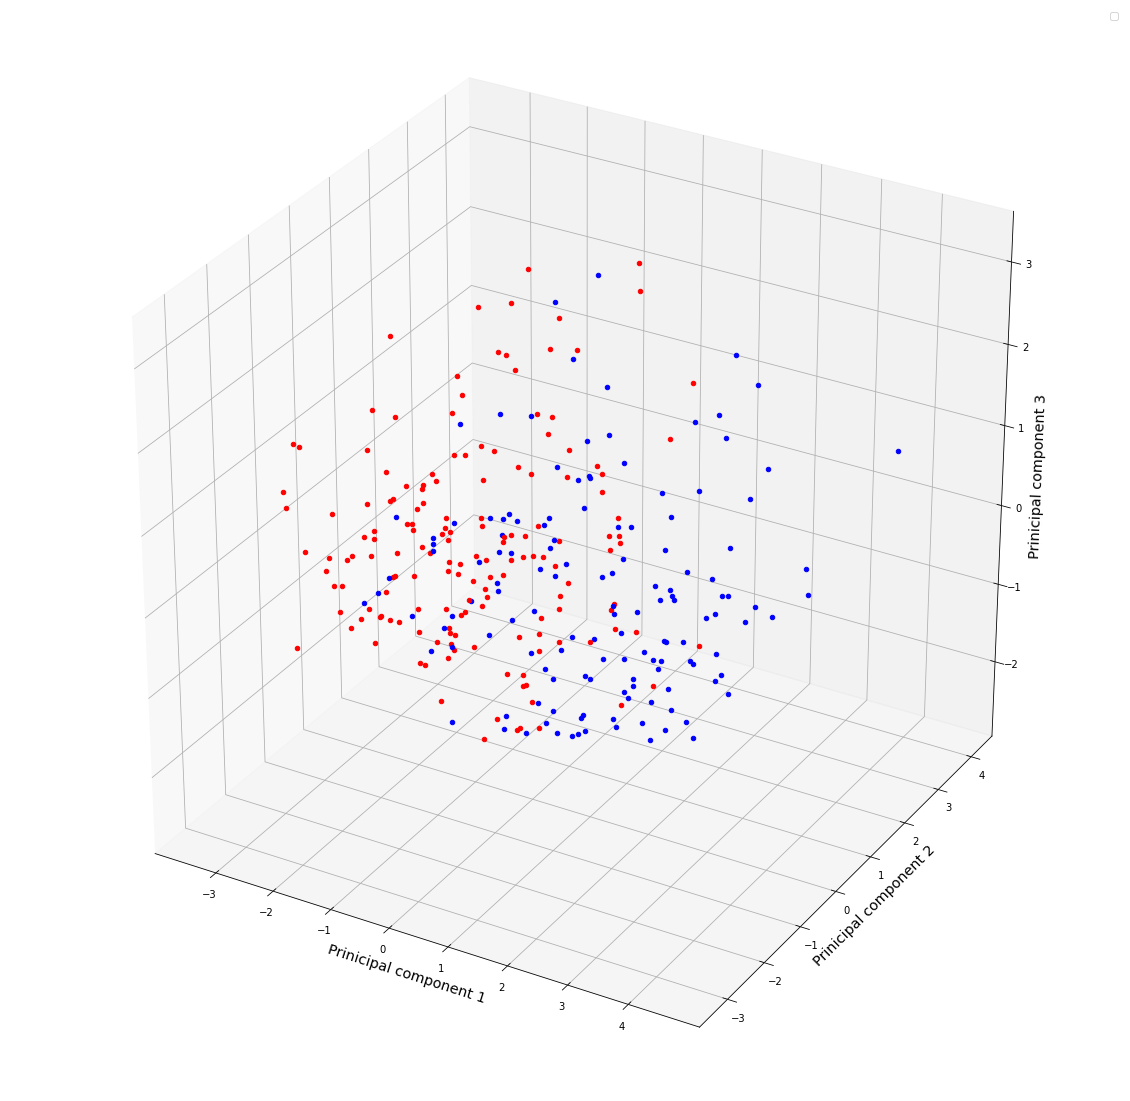

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

df_pca = df.copy(deep=True)

# Separate the features 
features = df.iloc[:, :-1].values
target = df.iloc[:, -1].values

# Standarddise the features 
X = StandardScaler().fit_transform(features)

#The original dataset has 13 columns - first we will try to fit the 13 dimensions into 2D 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', label=['healthy','diseased'])
colors = ['red','blue']
for index, patient in enumerate(principalComponents):
    ax.scatter(patient[0], patient[1], patient[2], c=colors[target[index]])
    
ax.legend(['healthy','diseased'],fontsize='xx-large')
ax.set_xlabel('Prinicipal component 1',fontsize='x-large')
ax.set_ylabel('Prinicipal component 2',fontsize='x-large')
ax.set_zlabel('Prinicipal component 3',fontsize='x-large')
plt.legend()

## 4.Feature Selection 



### Univariate Selection 

Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.

A chi-squared (chi2) statistical test for non-negative features to select the 10 best features


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()

X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  187.053104
11        ca   82.730613
9    oldpeak   68.570533
12      thal   65.221093
8      exang   35.508090
0        age   22.917697
4       chol   20.855084
3   trestbps   16.707463
2         cp   14.591587
6    restecg    8.134652
10     slope    7.828836
1        sex    7.444195


### Feature Importance 

Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.

Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.

Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.07320594 0.04606934 0.1125803  0.06077929 0.06148243 0.01959539
 0.03428345 0.0832363  0.08363073 0.08031806 0.05714869 0.13209514
 0.15557497]


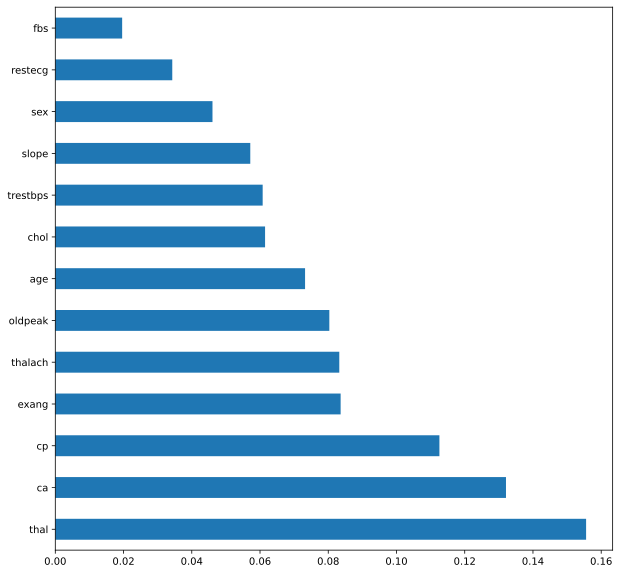

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()



##  5.Data - Preprocessing 

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# For data preprocessing rename columns 
df.columns = ['age', 
              'sex', 
              'chest_pain_type', 
              'resting_blood_pressure', 
              'cholesterol', 
              'fasting_blood_sugar', 
              'rest_ecg_type', 
              'max_heart_rate_achieved',
              'exercise_induced_angina', 
              'st_depression', 
              'st_slope_type', 
              'num_major_vessels', 
              'thalassemia_type', 
              'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [ ]:
#cp - chest_pain_type
#df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
#df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
#df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'
#df.loc[df['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'

#restecg - rest_ecg_type
#df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'normal'
#df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'ST-T wave abnormality'
#df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'showing probable or definite left ventricular hypertrophy by Estes` criteria'

#slope - st_slope_type
#df.loc[df['st_slope_type'] == 3, 'st_slope_type'] = 'downsloping'
#df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'flat'
#df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
#df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
#df.loc[df['thalassemia_type'] == 6, 'thalassemia_type'] = 'fixed defect'
#df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'normal'
#df.loc[df['thalassemia_type'] == 7, 'thalassemia_type'] = 'reversable defect'


In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Feature Encoding
- Numeric Variables = StandardScaler 
- Categorical Variables = One-Hot Encoding

Feature Descriptions

target variable (0 = no heart disease; 1 = heart disease) 
- Binary Features 
  - Sex: (0 = female; 1 = male)
  - fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
  - exang: Exercise induced angina (0 = no; 1 = yes) 


- Categorical Features:
  - cp: Chest pain type (0 = Asymptomatic angina; 1 = Atypical angina; 2 = Non-angina; 3 = Typical angina)
  - restecg: Resting ECG (0 = Left ventricular hypertrophy; 1 = Normal; 2 = ST-T wave abnormality)
  - slope: Slope of the peak exercise ST segment (0 = downsloping; 1 = upsloping; 2 = flat)
  - thal: Thalium stress test result (0 = NA; 1 = Fixed defect; 2 = Normal; 3 = Reversible defect)


- Ordinal Features: 
   - ca: number of major vessels (0-3) colored by flourosopy


- Numeric:
  - age
  - oldpeak: ST depression induced by exercise relative to rest
  - trestbps: Resting blood pressure
  - chol: Serum cholestoral in mg/dl
  - thalach: Maximum heart rate achieved during thalium stress test



- Target variable 
  - 1 = heart disease; 0 = no heart disease


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
binary = ['sex', 'fbs', 'exang']
categorical = ['cp', 'restecg', 'slope', 'thal']
ordinal = ['ca']
numeric = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
clt = make_column_transformer(
    (StandardScaler(), numeric),
    (OneHotEncoder(), categorical)
)

In [ ]:
X_train

array([[58.,  0.,  4., ...,  2.,  2.,  6.],
       [53.,  0.,  4., ...,  2.,  0.,  3.],
       [39.,  1.,  4., ...,  2.,  0.,  7.],
       ...,
       [63.,  1.,  4., ...,  1.,  3.,  7.],
       [50.,  1.,  4., ...,  2.,  0.,  7.],
       [64.,  1.,  4., ...,  2.,  2.,  6.]])

In [ ]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [ ]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 6.Machine Learning 

### Logistic Regression

In [ ]:
## Logistic Regression 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Model Fitting
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicition
y_pred = classifier.predict(X_test)

In [ ]:
# Model Evaluation 
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [ ]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [ ]:
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8607594936708861
Accuracy for test set for Logistic Regression = 0.8166666666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        30
           1       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



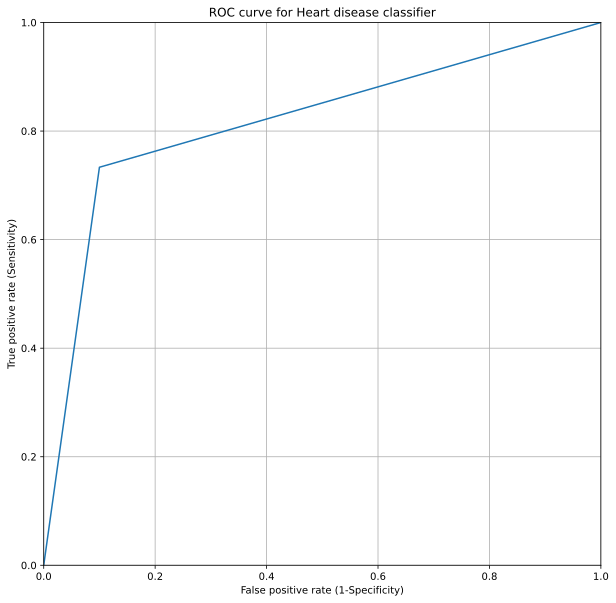

In [ ]:
# ROC curve 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.8166666666666667

### Multilayer Perceptron 

In [ ]:
def create_mlp():
    params = {
        'alpha': [1e-3, 1e-5],
        'hidden_layer_sizes': [(5,2), (5,5), (10,10)]
    }

    mlp = MLPClassifier(solver='lbfgs', random_state=33)
    return GridSearchCV(estimator=mlp, param_grid=params)

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip uninstall matplotlib
!pip install --upgrade matplotlib

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? 

In [ ]:
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)])

In [ ]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
trainer = tf.keras.optimizers.SGD(learning_rate=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
def kfold_results(clf, X, y, cv =10):
    predicted = cross_val_predict(clf, X, y, cv=cv)
    
    confusion_matrix = metrics.confusion_matrix(y, predicted)
    print("confusion matrix:\n", metrics.confusion_matrix(y, predicted))
    
    true_positive = confusion_matrix[0,0]
    true_negative = confusion_matrix[1,1]
    false_positive = confusion_matrix[0,1]
    false_negative = confusion_matrix[1,0]
    
    recall_score = true_positive / (true_positive + false_negative)
    print("recall_score ", recall_score)
    
    specificity = true_negative / (true_negative + false_positive)
    print('specificity ', specificity)
    
    precision_score =  true_positive / (true_positive + false_positive)
    print("precision ", precision_score)
    
    negative_predictive_value = true_negative / (true_negative + false_negative)
    print("negative_predictive_value ", negative_predictive_value)
    
    f1_score = (2 * precision_score * recall_score) / (precision_score + recall_score)
    print("f1_score ", f1_score)
    
    roc_auc_score = metrics.roc_auc_score(y, predicted)
    print("roc_auc_score ", roc_auc_score)
    
    total=sum(sum(confusion_matrix))
    accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/total
    print ('accuracy ', accuracy)
    
    return confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy, specificity, negative_predictive_value

### Artificial Neural Netowrk 

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 

In [ ]:
tf.__version__

In [ ]:
# Initialize ANN 
ann = tf.keras.models.Sequential()

In [ ]:
# Add the input layer and the first hidden layer 
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))


In [ ]:
# Add the second hidden layer 
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [ ]:
# Add output layer 
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 35, epochs = 75)

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Results Function 
